In [1]:
# Final Project - Word Embedding with Neural Networks
# Student: Christopher Mastrangelo
# note that in order to use this you must create a new conda environment withe the correct version of python and other tools
# when running this notebook the kernel must be switched to the new env 'final_project'
# also make sure to use unique file names for inputs and outputs

import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm

# Drawing the embeddings
import matplotlib.pyplot as plt

In [2]:
# Deep learning: more dependencies
# luckily all the required packages were already installed in my mlenv anaconda environment used in class

from keras.models import Input, Model
from keras.layers import Dense

from scipy import sparse

# Custom functions- my own version saved in my local folder
from utils import text_preprocessing, create_unique_word_dict, clean_text

Using TensorFlow backend.


In [3]:
# here is where the real code begins 
# the first line of the input data file must contain the word text and nothing else
# also no commas of course - capitalization does not matter - also consider concatenating proper names


# Defining the window for context
window = 2

# Reading the text from the input folder
texts = pd.read_csv('input/sample_astro2.csv')
# restore later after I play around with manually introducing new text
texts = [x for x in texts['text']]

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)

    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])
                
unique_word_dict = create_unique_word_dict(all_text)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

In [4]:
# for simplicity and debugging I am splitting up the code into cells that can be run individually
for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
X = sparse.csr_matrix(X)
Y = sparse.csr_matrix(Y)


272it [00:00, 45345.63it/s]


In [5]:
# lets inspect the contents of the variables before moving to the next steps 
# looks like the X variable has 1355 data points

print(all_text)

['arcturus', 'north', 'of', 'equator', 'arcturus', 'closer', 'to', 'equator', 'than', 'sun', 'for', 'two', 'months', 'of', 'year', 'arcturus', 'one', 'of', 'brightest', 'navigations', 'stars', 'northern', 'hemisphere', 'arcturus', 'could', 'northern', 'circumpolar', 'star', 'if', 'it', 'were', 'further', 'north', 'because', 'of', 'its', 'location', 'near', 'bigdipper', 'arcturus', 'almost', 'due', 'north', 'of', 'spica', 'virgo', 'spica', 'star', 'that', 'south', 'of', 'arcturus', 'regulus', 'star', 'that', 'south', 'of', 'arcturus', 'regulus', 'west', 'of', 'arcturus', 'sun', 'south', 'of', 'arcturus', 'months', 'of', 'year', 'sun', 'south', 'of', 'regulus', 'months', 'of', 'year', 'arcturus', 'constellation', 'bootes', 'spica', 'constellation', 'virgo', 'regulus', 'constellation', 'leo', 'spica', 'east', 'of', 'regulus']


In [6]:
# here is the next chunk of code to make sure it runs 
# we get an error from the model.fit so lets walk it through 1 line at a time

# STOP HERE FOR NOW UNTIL I COMPLETE MORE TROUBLESHOOTING 

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')



In [7]:
# I put this is its own cell because it generated an error the first time I ran the code
# this problem was solved by creating a new conda environment called 'final_project' with exact versions of software
# Optimizing the network weights

model.fit(
    x=X, 
    y=Y, 
    batch_size=256,
    epochs=1000
    )

Epoch 1/1000
272/272 [==============================] - 0s 1ms/step - loss: 3.7405
Epoch 2/1000
272/272 [==============================] - 0s 125us/step - loss: 3.7390
Epoch 3/1000
272/272 [==============================] - 0s 110us/step - loss: 3.7378
Epoch 4/1000
272/272 [==============================] - 0s 110us/step - loss: 3.7366
Epoch 5/1000
272/272 [==============================] - 0s 151us/step - loss: 3.7355
Epoch 6/1000
272/272 [==============================] - 0s 121us/step - loss: 3.7343
Epoch 7/1000
272/272 [==============================] - 0s 103us/step - loss: 3.7332
Epoch 8/1000
272/272 [==============================] - 0s 107us/step - loss: 3.7322
Epoch 9/1000
272/272 [==============================] - 0s 140us/step - loss: 3.7311
Epoch 10/1000
272/272 [==============================] - 0s 118us/step - loss: 3.7300
Epoch 11/1000
272/272 [==============================] - 0s 132us/step - loss: 3.7290
Epoch 12/1000
272/272 [==============================] - ETA: 0s 

272/272 [==============================] - 0s 129us/step - loss: 3.6463
Epoch 96/1000
272/272 [==============================] - 0s 132us/step - loss: 3.6452
Epoch 97/1000
272/272 [==============================] - 0s 136us/step - loss: 3.6440
Epoch 98/1000
272/272 [==============================] - 0s 114us/step - loss: 3.6429
Epoch 99/1000
272/272 [==============================] - 0s 132us/step - loss: 3.6418
Epoch 100/1000
272/272 [==============================] - 0s 129us/step - loss: 3.6407
Epoch 101/1000
272/272 [==============================] - 0s 118us/step - loss: 3.6397
Epoch 102/1000
272/272 [==============================] - 0s 118us/step - loss: 3.6387
Epoch 103/1000
272/272 [==============================] - 0s 125us/step - loss: 3.6376
Epoch 104/1000
272/272 [==============================] - 0s 143us/step - loss: 3.6366
Epoch 105/1000
272/272 [==============================] - 0s 125us/step - loss: 3.6355
Epoch 106/1000
272/272 [==============================] - 0s 9

272/272 [==============================] - 0s 103us/step - loss: 3.5246
Epoch 190/1000
272/272 [==============================] - 0s 107us/step - loss: 3.5230
Epoch 191/1000
272/272 [==============================] - 0s 99us/step - loss: 3.5214
Epoch 192/1000
272/272 [==============================] - 0s 81us/step - loss: 3.5198
Epoch 193/1000
272/272 [==============================] - 0s 96us/step - loss: 3.5182
Epoch 194/1000
272/272 [==============================] - 0s 77us/step - loss: 3.5166
Epoch 195/1000
272/272 [==============================] - 0s 85us/step - loss: 3.5150
Epoch 196/1000
272/272 [==============================] - 0s 92us/step - loss: 3.5136
Epoch 197/1000
272/272 [==============================] - 0s 96us/step - loss: 3.5122
Epoch 198/1000
272/272 [==============================] - 0s 81us/step - loss: 3.5107
Epoch 199/1000
272/272 [==============================] - 0s 107us/step - loss: 3.5093
Epoch 200/1000
272/272 [==============================] - 0s 88us/

272/272 [==============================] - 0s 85us/step - loss: 3.3760
Epoch 285/1000
272/272 [==============================] - 0s 121us/step - loss: 3.3747
Epoch 286/1000
272/272 [==============================] - 0s 99us/step - loss: 3.3734
Epoch 287/1000
272/272 [==============================] - 0s 96us/step - loss: 3.3721
Epoch 288/1000
272/272 [==============================] - 0s 96us/step - loss: 3.3708
Epoch 289/1000
272/272 [==============================] - 0s 96us/step - loss: 3.3694
Epoch 290/1000
272/272 [==============================] - 0s 107us/step - loss: 3.3681
Epoch 291/1000
272/272 [==============================] - 0s 92us/step - loss: 3.3667
Epoch 292/1000
272/272 [==============================] - 0s 85us/step - loss: 3.3652
Epoch 293/1000
272/272 [==============================] - 0s 92us/step - loss: 3.3639
Epoch 294/1000
272/272 [==============================] - 0s 92us/step - loss: 3.3625
Epoch 295/1000
272/272 [==============================] - 0s 99us/s

272/272 [==============================] - 0s 85us/step - loss: 3.2824
Epoch 380/1000
272/272 [==============================] - 0s 96us/step - loss: 3.2819
Epoch 381/1000
272/272 [==============================] - 0s 81us/step - loss: 3.2813
Epoch 382/1000
272/272 [==============================] - 0s 88us/step - loss: 3.2807
Epoch 383/1000
272/272 [==============================] - 0s 92us/step - loss: 3.2801
Epoch 384/1000
272/272 [==============================] - 0s 92us/step - loss: 3.2795
Epoch 385/1000
272/272 [==============================] - 0s 107us/step - loss: 3.2789
Epoch 386/1000
272/272 [==============================] - 0s 99us/step - loss: 3.2783
Epoch 387/1000
272/272 [==============================] - 0s 95us/step - loss: 3.2777
Epoch 388/1000
272/272 [==============================] - 0s 96us/step - loss: 3.2771
Epoch 389/1000
272/272 [==============================] - 0s 114us/step - loss: 3.2765
Epoch 390/1000
272/272 [==============================] - 0s 96us/s

272/272 [==============================] - 0s 77us/step - loss: 3.2340
Epoch 474/1000
272/272 [==============================] - 0s 85us/step - loss: 3.2335
Epoch 475/1000
272/272 [==============================] - 0s 88us/step - loss: 3.2331
Epoch 476/1000
272/272 [==============================] - 0s 81us/step - loss: 3.2326
Epoch 477/1000
272/272 [==============================] - 0s 96us/step - loss: 3.2322
Epoch 478/1000
272/272 [==============================] - 0s 107us/step - loss: 3.2319
Epoch 479/1000
272/272 [==============================] - 0s 96us/step - loss: 3.2315
Epoch 480/1000
272/272 [==============================] - 0s 107us/step - loss: 3.2311
Epoch 481/1000
272/272 [==============================] - 0s 107us/step - loss: 3.2307
Epoch 482/1000
272/272 [==============================] - 0s 96us/step - loss: 3.2302
Epoch 483/1000
272/272 [==============================] - 0s 103us/step - loss: 3.2298
Epoch 484/1000
272/272 [==============================] - 0s 107u

272/272 [==============================] - 0s 92us/step - loss: 3.1963
Epoch 568/1000
272/272 [==============================] - 0s 103us/step - loss: 3.1959
Epoch 569/1000
272/272 [==============================] - 0s 88us/step - loss: 3.1955
Epoch 570/1000
272/272 [==============================] - 0s 125us/step - loss: 3.1951
Epoch 571/1000
272/272 [==============================] - 0s 96us/step - loss: 3.1947
Epoch 572/1000
272/272 [==============================] - 0s 85us/step - loss: 3.1944
Epoch 573/1000
272/272 [==============================] - 0s 88us/step - loss: 3.1940
Epoch 574/1000
272/272 [==============================] - 0s 88us/step - loss: 3.1935
Epoch 575/1000
272/272 [==============================] - 0s 92us/step - loss: 3.1931
Epoch 576/1000
272/272 [==============================] - 0s 96us/step - loss: 3.1927
Epoch 577/1000
272/272 [==============================] - 0s 96us/step - loss: 3.1923
Epoch 578/1000
272/272 [==============================] - 0s 85us/s

272/272 [==============================] - 0s 96us/step - loss: 3.1624
Epoch 662/1000
272/272 [==============================] - 0s 88us/step - loss: 3.1620
Epoch 663/1000
272/272 [==============================] - 0s 96us/step - loss: 3.1617
Epoch 664/1000
272/272 [==============================] - 0s 88us/step - loss: 3.1614
Epoch 665/1000
272/272 [==============================] - 0s 103us/step - loss: 3.1611
Epoch 666/1000
272/272 [==============================] - 0s 85us/step - loss: 3.1608
Epoch 667/1000
272/272 [==============================] - 0s 96us/step - loss: 3.1605
Epoch 668/1000
272/272 [==============================] - 0s 88us/step - loss: 3.1602
Epoch 669/1000
272/272 [==============================] - 0s 96us/step - loss: 3.1599
Epoch 670/1000
272/272 [==============================] - 0s 96us/step - loss: 3.1596
Epoch 671/1000
272/272 [==============================] - 0s 88us/step - loss: 3.1593
Epoch 672/1000
272/272 [==============================] - 0s 99us/st

272/272 [==============================] - 0s 96us/step - loss: 3.1321
Epoch 756/1000
272/272 [==============================] - 0s 96us/step - loss: 3.1318
Epoch 757/1000
272/272 [==============================] - 0s 85us/step - loss: 3.1315
Epoch 758/1000
272/272 [==============================] - 0s 85us/step - loss: 3.1311
Epoch 759/1000
272/272 [==============================] - 0s 96us/step - loss: 3.1308
Epoch 760/1000
272/272 [==============================] - 0s 88us/step - loss: 3.1305
Epoch 761/1000
272/272 [==============================] - 0s 99us/step - loss: 3.1302
Epoch 762/1000
272/272 [==============================] - ETA: 0s - loss: 3.089 - 0s 107us/step - loss: 3.1299
Epoch 763/1000
272/272 [==============================] - 0s 92us/step - loss: 3.1296
Epoch 764/1000
272/272 [==============================] - 0s 99us/step - loss: 3.1293
Epoch 765/1000
272/272 [==============================] - 0s 92us/step - loss: 3.1291
Epoch 766/1000
272/272 [====================

272/272 [==============================] - 0s 143us/step - loss: 3.1049
Epoch 850/1000
272/272 [==============================] - 0s 88us/step - loss: 3.1046
Epoch 851/1000
272/272 [==============================] - 0s 114us/step - loss: 3.1043
Epoch 852/1000
272/272 [==============================] - 0s 88us/step - loss: 3.1040
Epoch 853/1000
272/272 [==============================] - 0s 81us/step - loss: 3.1038
Epoch 854/1000
272/272 [==============================] - 0s 92us/step - loss: 3.1035
Epoch 855/1000
272/272 [==============================] - 0s 77us/step - loss: 3.1032
Epoch 856/1000
272/272 [==============================] - 0s 92us/step - loss: 3.1029
Epoch 857/1000
272/272 [==============================] - 0s 92us/step - loss: 3.1026
Epoch 858/1000
272/272 [==============================] - 0s 92us/step - loss: 3.1023
Epoch 859/1000
272/272 [==============================] - 0s 88us/step - loss: 3.1020
Epoch 860/1000
272/272 [==============================] - 0s 88us/s

272/272 [==============================] - 0s 85us/step - loss: 3.0800
Epoch 944/1000
272/272 [==============================] - 0s 88us/step - loss: 3.0798
Epoch 945/1000
272/272 [==============================] - 0s 96us/step - loss: 3.0795
Epoch 946/1000
272/272 [==============================] - 0s 96us/step - loss: 3.0792
Epoch 947/1000
272/272 [==============================] - 0s 103us/step - loss: 3.0790
Epoch 948/1000
272/272 [==============================] - 0s 96us/step - loss: 3.0787
Epoch 949/1000
272/272 [==============================] - 0s 92us/step - loss: 3.0785
Epoch 950/1000
272/272 [==============================] - 0s 114us/step - loss: 3.0782
Epoch 951/1000
272/272 [==============================] - 0s 118us/step - loss: 3.0780
Epoch 952/1000
272/272 [==============================] - 0s 107us/step - loss: 3.0777
Epoch 953/1000
272/272 [==============================] - 0s 107us/step - loss: 3.0775
Epoch 954/1000
272/272 [==============================] - 0s 88u

Cannot create output folder: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Christopher\\Desktop\\Class_Folder\\final_project2_deep_learning\\output'


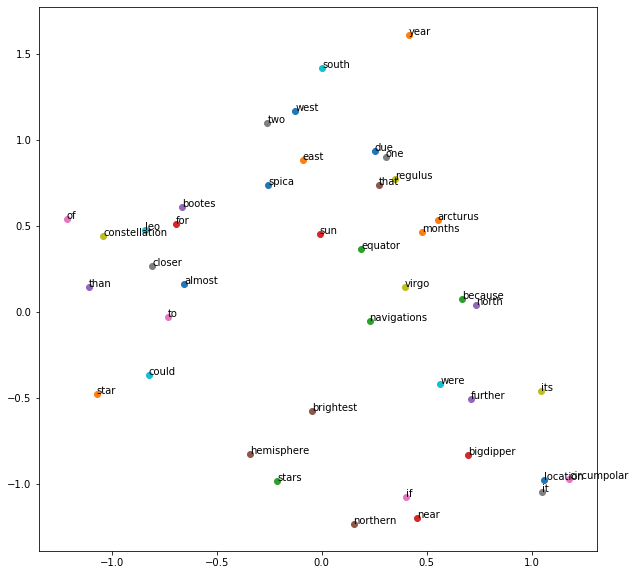

In [8]:
# now that the model has vbeen fit - question - Is 1000 epochs really necessary? could we do it with less? 
# Obtaining the weights from the neural network. 
# These are the so called word embeddings

# The input layer 
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

# Ploting the embeddings
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))       

# Saving the embedding vector to a txt file
try:
    os.mkdir(f'{os.getcwd()}\\output')        
except Exception as e:
    print(f'Cannot create output folder: {e}')

with open(f'{os.getcwd()}\\output\\astro2_out_vectors.txt', 'w') as f:
    for key, value in embedding_dict.items():
        try:
            f.write(f'{key}: {value}\n')   
        except Exception as e:
            print(f'Cannot write word {key} to dict: {e}')   

In [9]:
# look at more variables we could use in a visualization 
# what about plural forms such as month months or conjunctions for it its of to ?
unique_word_dict

{'almost': 0,
 'arcturus': 1,
 'because': 2,
 'bigdipper': 3,
 'bootes': 4,
 'brightest': 5,
 'circumpolar': 6,
 'closer': 7,
 'constellation': 8,
 'could': 9,
 'due': 10,
 'east': 11,
 'equator': 12,
 'for': 13,
 'further': 14,
 'hemisphere': 15,
 'if': 16,
 'it': 17,
 'its': 18,
 'leo': 19,
 'location': 20,
 'months': 21,
 'navigations': 22,
 'near': 23,
 'north': 24,
 'northern': 25,
 'of': 26,
 'one': 27,
 'regulus': 28,
 'south': 29,
 'spica': 30,
 'star': 31,
 'stars': 32,
 'sun': 33,
 'than': 34,
 'that': 35,
 'to': 36,
 'two': 37,
 'virgo': 38,
 'were': 39,
 'west': 40,
 'year': 41}